
# Kaggle Competition: [Telstra Network Disruptions](https://www.kaggle.com/c/telstra-recruiting-network)

## Exploratory Data Analysis

- Lets load the data into a pandas dataframe, and visualize how the data looks

The goal of the problem is to predict Telstra network's fault severity at a time at a particular location based on the log data available. Each row in the main dataset (train.csv, test.csv) represents a location and a time point. They are identified by the "id" column, which is the key "id" used in other data files. 

Fault severity has 3 categories: 0,1,2 (0 meaning no fault, 1 meaning only a few, and 2 meaning many). 

Different types of features are extracted from log files and other sources: event_type.csv, log_feature.csv, resource_type.csv, severity_type.csv. 

Note: “severity_type” is a feature extracted from the log files (in severity_type.csv). Often this is a severity type of a warning message coming from the log. "severity_type" is categorical. It does not have an ordering. “fault_severity” is a measurement of actual reported faults from users of the network and is the target variable (in train.csv).

<img src = 'relational_data.PNG'>

In [2]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import IPython.utils.warn as warn
random.seed(100)
import json
import csv
import pickle
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\admin\AppData\Roaming\Python\Python27\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\admin\AppData\Roaming\Python\Python27\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
#Import Pandas Dataframe
import pandas as pd

###Load train, test, event_type, severity_type, resource_type,log_feature csv files into pandas dataframe

In [4]:
train = pd.read_csv('Telstra_data/train.csv')

In [5]:
print train.dtypes
train.set_index([train.id],inplace=True)
print '__________________________'
print train[:10]
print 'Number of tuples:', len(train)

def get_num(z):
    return str(z).split()[1]

train['location'] = train['location'].apply(lambda x: get_num(x)) # returns DataFrame
print train

id                 int64
location          object
fault_severity     int64
dtype: object
__________________________
          id      location  fault_severity
id                                        
14121  14121  location 118               1
9320    9320   location 91               0
14394  14394  location 152               1
8218    8218  location 931               1
14804  14804  location 120               0
1080    1080  location 664               0
9731    9731  location 640               0
15505  15505  location 122               0
3443    3443  location 263               1
13300  13300  location 613               1
Number of tuples: 7381
          id location  fault_severity
id                                   
14121  14121      118               1
9320    9320       91               0
14394  14394      152               1
8218    8218      931               1
14804  14804      120               0
1080    1080      664               0
9731    9731      640               0
155

In [6]:
test = pd.read_csv('Telstra_data/test.csv')

In [7]:
test['location'] = test['location'].apply(lambda x: get_num(x)) # returns DataFrame
test.set_index([test.id],inplace=True)
print test.dtypes
print '__________________________'
print test[:10]
print 'Number of tuples:', len(test)

id           int64
location    object
dtype: object
__________________________
          id location
id                   
11066  11066      481
18000  18000      962
16964  16964      491
4795    4795      532
3392    3392      600
3795    3795      794
2881    2881      375
1903    1903      638
5245    5245      690
6726    6726      893
Number of tuples: 11171


In [8]:
event_type = pd.read_csv('Telstra_data/event_type.csv')
event_type.set_index([event_type.id],inplace=True)
#event_type['event_type'] = event_type['event_type'].apply(lambda x: get_num(x)) # returns DataFrame

print event_type.dtypes
print '__________________________'
print event_type[:10]
print 'Number of tuples:', len(event_type)

id             int64
event_type    object
dtype: object
__________________________
          id     event_type
id                         
6597    6597  event_type 11
8011    8011  event_type 15
2597    2597  event_type 15
5022    5022  event_type 15
5022    5022  event_type 11
6852    6852  event_type 11
6852    6852  event_type 15
5611    5611  event_type 15
14838  14838  event_type 15
14838  14838  event_type 11
Number of tuples: 31170


In [9]:
resource_type = pd.read_csv('Telstra_data/resource_type.csv')
resource_type.set_index([resource_type.id],inplace=True)
#resource_type['resource_type'] = resource_type['resource_type'].apply(lambda x: get_num(x)) # returns DataFrame

print resource_type.dtypes
print '__________________________'
print resource_type[:10]
print 'Number of tuples:',len(resource_type)

id                int64
resource_type    object
dtype: object
__________________________
          id    resource_type
id                           
6597    6597  resource_type 8
8011    8011  resource_type 8
2597    2597  resource_type 8
5022    5022  resource_type 8
6852    6852  resource_type 8
5611    5611  resource_type 8
14838  14838  resource_type 8
2588    2588  resource_type 8
4848    4848  resource_type 8
6914    6914  resource_type 8
Number of tuples: 21076


In [10]:
severity_type = pd.read_csv('Telstra_data/severity_type.csv')
severity_type.set_index([severity_type.id],inplace=True)
severity_type['severity_type'] = severity_type['severity_type'].apply(lambda x: get_num(x)) # returns DataFrame

print severity_type.dtypes
print '__________________________'
print severity_type[:10]
print 'Number of tuples:-',len(severity_type)

id                int64
severity_type    object
dtype: object
__________________________
          id severity_type
id                        
6597    6597             2
8011    8011             2
2597    2597             2
5022    5022             1
6852    6852             1
5611    5611             2
14838  14838             1
2588    2588             1
4848    4848             1
6914    6914             1
Number of tuples:- 18552


In [11]:
log_feature = pd.read_csv('Telstra_data/log_feature.csv')
log_feature.set_index([log_feature.id],inplace=True)
#log_feature['log_feature'] = log_feature['log_feature'].apply(lambda x: get_num(x)) # returns DataFrame

print log_feature.dtypes
print '__________________________'
print log_feature[:10]
print 'Number of tuples:-',len(log_feature)

id              int64
log_feature    object
volume          int64
dtype: object
__________________________
        id  log_feature  volume
id                             
6597  6597   feature 68       6
8011  8011   feature 68       7
2597  2597   feature 68       1
5022  5022  feature 172       2
5022  5022   feature 56       1
5022  5022  feature 193       4
5022  5022   feature 71       3
6852  6852  feature 201       2
6852  6852   feature 56       1
6852  6852   feature 80       2
Number of tuples:- 58671


In [12]:
log_feature1 = pd.read_csv('Telstra_data/log_feature.csv')
log_feature1.set_index([log_feature.id],inplace=True)
#log_feature['log_feature'] = log_feature['log_feature'].apply(lambda x: get_num(x)) # returns DataFrame

print log_feature1.dtypes
print '__________________________'
print 'Number of tuples:-',len(log_feature1)

log_feature1['Value'] = log_feature1.apply(lambda row: (row['log_feature'] + (str(row['volume']))),axis=1)
print log_feature1[:10]

id              int64
log_feature    object
volume          int64
dtype: object
__________________________
Number of tuples:- 58671
        id  log_feature  volume         Value
id                                           
6597  6597   feature 68       6   feature 686
8011  8011   feature 68       7   feature 687
2597  2597   feature 68       1   feature 681
5022  5022  feature 172       2  feature 1722
5022  5022   feature 56       1   feature 561
5022  5022  feature 193       4  feature 1934
5022  5022   feature 71       3   feature 713
6852  6852  feature 201       2  feature 2012
6852  6852   feature 56       1   feature 561
6852  6852   feature 80       2   feature 802


### Insight from the forums:

<b>"id=1234, log_feature='feature 22', volume=6"</b> ---means----< <b>"For the location & date associated with id 1234, feature 22 appeared in the log 6 times."</b> A particular log can contain many different types of log features. And each feature might occur multiple times in the log.

##Joining all the fields together into a single dataframe

In [13]:
print train.index

Int64Index([14121,  9320, 14394,  8218, 14804,  1080,  9731, 15505,  3443,
            13300, 
            ...
             4065,  1628, 16687,  6813, 10455,   870, 18068, 14111, 15189,
            17067],
           dtype='int64', name=u'id', length=7381)


In [14]:
joined = pd.merge(train, severity_type, left_index=True, right_index=True, how='left')
joined.drop(['id_y'],inplace=True,axis=1)

#print joined

joined1 = pd.merge(joined, event_type, left_index=True, right_index=True, how='left')
joined1.drop(['id'],inplace=True,axis=1)
#print joined1

for x,value in joined1.iterrows():
    splt = str(value['event_type']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined1.columns:
        joined1.set_value(x, concat, 1)
    else: # if column does not exist
        joined1[concat] = 0
        joined1.set_value(x, concat, 1)

joined1.drop(['event_type'],inplace=True,axis=1)
joined1.drop_duplicates(inplace=True)
#print joined1

joined2 = pd.merge(joined1, resource_type, left_index=True, right_index=True, how='left')
joined2.drop(['id'],inplace=True,axis=1)

for x,value in joined2.iterrows():
    splt = str(value['resource_type']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined2.columns:
        joined2.set_value(x, concat, 1)
    else: # if column does not exist
        joined2[concat] = 0
        joined2.set_value(x, concat, 1)

joined2.drop(['resource_type'],inplace=True,axis=1)
joined2.drop_duplicates(inplace=True)
#print joined2

joined3 = pd.merge(joined2, log_feature, left_index=True, right_index=True, how='left')
joined3.drop(['id'],inplace=True,axis=1)
joined3.drop(['id_x'],inplace=True,axis=1)

for x,value in joined3.iterrows():
    splt = str(value['log_feature']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined3.columns:
        joined3.set_value(x, concat, value['volume'])
    else: # if column does not exist
        joined3[concat] = 0
        joined3.set_value(x, concat, value['volume'])

joined3.drop(['log_feature'],inplace=True,axis=1)
joined3.drop(['volume'],inplace=True,axis=1)

joined3.drop_duplicates(inplace=True)


print joined3['location']

id
1         601
5         460
6         332
8         243
13        418
19        644
20         79
23        257
24        367
26        238
27        793
28        889
29        505
31        457
33        473
38        468
43        300
44        451
49        484
53        242
54        488
55        471
57       1075
59        602
60        931
61        284
64        921
67        821
68        684
69        875
         ... 
18473    1106
18474     821
18480     485
18482    1050
18484     535
18490    1008
18492     135
18493     700
18498     892
18503     123
18506     845
18507     429
18508     709
18511     648
18520     875
18524     834
18525     810
18527     135
18528    1042
18530     756
18533     734
18535     133
18536     821
18537     149
18538    1106
18539     147
18542     495
18543     998
18548     278
18550      12
Name: location, dtype: object


In [15]:
X = pd.DataFrame(joined3)
X.sort_index(axis=0)
Y = X['fault_severity']
del X['fault_severity']
print X

      location severity_type  event_type_11  event_type_13  event_type_34  \
id                                                                          
1          601             1              1              1              0   
5          460             2              0              0              1   
6          332             2              0              0              1   
8          243             2              0              0              1   
13         418             2              0              0              1   
19         644             1              0              0              0   
20          79             2              1              0              0   
23         257             2              0              0              1   
24         367             4              0              0              0   
26         238             4              0              0              0   
27         793             1              1              0              0   

# Helper File for kaggle submissions

In [ ]:
# write a kaggle submission file for "whats cooking"
def write_csv_kaggle(fname, ids, target):
    # header
    tmp = [['id', 'predict_0', 'predict_1', 'predict_2']]
    
    for i in range(0,len(ids),1):
        # add a row (id and class prediction)
        tmp.append([ids[i], target[i][0], target[i][1],target[i][2]])
        
    # write CSV file
    f = open(fname, 'wb')
    writer = csv.writer(f)
    writer.writerows(tmp)
    f.close()

# Doing a 50-50 train test split

In [20]:
trainX, testX, trainY, testY = \
  cross_validation.train_test_split(X, Y, 
  train_size=0.50, test_size=0.50, random_state=1234, stratify = Y)

print type(trainY)
print type(Y)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#Preparing the Test Data

In [ ]:


joined_tst = pd.merge(test, severity_type, left_index=True, right_index=True, how='left')
joined_tst.drop(['id_y'],inplace=True,axis=1)

# Now, we have to create the same dataframe schema as for the train data set

list_columns = list(joined3.columns.values)

for x in list_columns:
    if x not in joined_tst:
        joined_tst[x] = 0

#print joined

joined1_tst = pd.merge(joined_tst, event_type, left_index=True, right_index=True, how='left')
joined1_tst.drop(['id'],inplace=True,axis=1)

for x,value in joined1_tst.iterrows():
    splt = str(value['event_type']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined1_tst.columns:
        joined1_tst.set_value(x, concat, 1)        

joined1_tst.drop(['event_type'],inplace=True,axis=1)
joined1_tst.drop_duplicates(inplace=True)
#print joined1_tst

joined2_tst = pd.merge(joined1_tst, resource_type, left_index=True, right_index=True, how='left')
joined2_tst.drop(['id'],inplace=True,axis=1)

for x,value in joined2_tst.iterrows():
    splt = str(value['resource_type']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined2_tst.columns:
        joined2_tst.set_value(x, concat, 1)

joined2_tst.drop(['resource_type'],inplace=True,axis=1)
joined2_tst.drop_duplicates(inplace=True)
#print joined2_tst

joined3_tst = pd.merge(joined2_tst, log_feature, left_index=True, right_index=True, how='left')
joined3_tst.drop(['id'],inplace=True,axis=1)

for x,value in joined3_tst.iterrows():
    splt = str(value['log_feature']).split()
    concat = splt[0] + '_'+ splt[1]
    if concat in joined3_tst.columns:
        joined3_tst.set_value(x, concat, value['volume'])

joined3_tst.drop(['log_feature'],inplace=True,axis=1)
joined3_tst.drop(['volume'],inplace=True,axis=1)

joined3_tst.drop_duplicates(inplace=True)
joined3_tst.drop(['id_x'],inplace=True,axis=1)

print joined3_tst

# Setting up the IPython Parallel client

In [ ]:
from IPython import parallel


In [ ]:
# load the client interface
from IPython import parallel

clients = parallel.Client()
clients.block = True   # wait for calculations to finish
print clients.ids      # client process ids

In [ ]:
%%px
# load libraries on clusters
from numpy import *
from sklearn import *
from pickle import *
from sklearn.metrics import *
from sklearn.grid_search import *
from sklearn.ensemble import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import *


In [ ]:
# get the load-balanced scheduler
lview = clients.load_balanced_view()


# Encapsulating data into one dictionary

In [ ]:
# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}


In [ ]:
test_ids_ = joined3_tst.index.tolist()
np.set_printoptions(threshold=20)

print len(test_ids_)

# Basic Decision Tree w/h gini 

In [ ]:
from sklearn import tree
dtclf_gini = tree.DecisionTreeClassifier(criterion = 'gini')
dtclf_gini = dtclf_gini.fit(X, Y)
dtpredY_gini= dtclf_gini.predict_proba(joined3_tst)


print dtpredY_gini



write_csv_kaggle('Decision_Tree_Gini_basic.csv',test_ids_,dtpredY_gini)

# Basic Decision Tree w/h entropy

In [ ]:
dtclf_ent = tree.DecisionTreeClassifier(criterion = 'entropy')
dtclf_ent = dtclf_ent.fit(X, Y)
dtpredY_ent = dtclf_ent.predict_proba(joined3_tst)
print dtpredY_ent

write_csv_kaggle('Decision_Tree_Entropy_basic.csv',test_ids_,dtpredY_ent)

# Random Forests- Parameter Tuning
   * (Insufficient Hardware Resources for Cross Validation)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

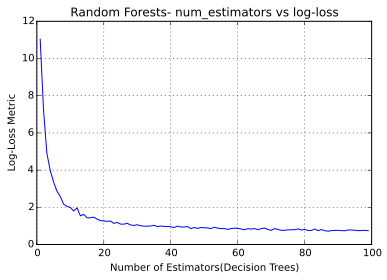

In [344]:
# RANDOM FORESTS- Parameter Tuning
# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
from sklearn.metrics import *
params = {'n_estimators': range(1,100,1)}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))

# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}

def RandomForests(data, params):
    clf = ensemble.RandomForestClassifier(n_estimators=params['n_estimators'])
    clf.fit(data['trainX'], data['trainY'])
    clf_probs = clf.predict_proba(data['testX'],)
    score = log_loss(data['testY'], clf_probs)
    # return a tuple with the accuracy and the parameters used
    return (score, params['n_estimators'])

# get the load-balanced scheduler
lview = clients.load_balanced_view()

lview.block = False

# run the function on all parameters
res = lview.map(RandomForests, [data]*len(pg), pg)


In [ ]:
x_axis = []
y_axis = []
    
for x in range(0,len(res)):
    x_axis.append(res[x][1])
    y_axis.append(res[x][0])
    
plt.plot(x_axis, y_axis)             # plot alpha value on x vs accuracy on y
plt.xlabel('Number of Estimators(Decision Trees)')                      # set the x-axis label
plt.ylabel('Log-Loss Metric')           # set the y-axis label
plt.title('Random Forests- num_estimators vs log-loss')  # set the title
plt.grid(True)

#Training Random Forests on the entire Data set

In [343]:
#Random Forests Training on Full Dataset
clf = ensemble.RandomForestClassifier(n_estimators=25)
clf.fit(X, Y)
clf_probs = clf.predict_proba(joined3_tst)

print clf_probs
write_csv_kaggle('Random_Forests_65estimators_basic.csv',test_ids_,clf_probs)

[[ 0.8   0.2   0.  ]
 [ 0.4   0.6   0.  ]
 [ 0.88  0.08  0.04]
 ..., 
 [ 0.96  0.04  0.  ]
 [ 1.    0.    0.  ]
 [ 1.    0.    0.  ]]


In [78]:
# LOGISTIC REGRESSION- Parameter Tuning
from sklearn.metrics import *
params = {'lr__C': linspace(0.00001,0.05,20)}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))

# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}

def LogReg(data, params):
    clf = ensemble.RandomForestClassifier(n_estimators=params['lr__C'])
    clf1 = linear_model.LogisticRegression(C = params['lr__C'])
    clf1.fit(data['trainX'], data['trainY'])
    clf_probs1 = clf1.predict_proba(data['testX'],)
    score = log_loss(data['testY'], clf_probs1)
    # return a tuple with the accuracy and the parameters used
    print (score, params['lr__C'])
    return (score, params['lr__C'])

# get the load-balanced scheduler
lview = clients.load_balanced_view()

lview.block = False

# run the function on all parameters
res = lview.map(LogReg, [data]*len(pg), pg)

In [79]:
for result in res:
    print result

(0.87883274518920595, 1.0000000000000001e-05)
(0.70420617028082944, 0.0026410526315789472)
(0.69577431690745062, 0.0052721052631578939)
(0.6921055276199739, 0.0079031578947368411)
(0.68994135862001438, 0.010534210526315788)
(0.68850998203322034, 0.013165263157894735)
(0.68768563568743868, 0.015796315789473683)
(0.68674396666002446, 0.01842736842105263)
(0.68627898238607177, 0.021058421052631577)
(0.68605379635402575, 0.023689473684210524)
(0.68578881477758902, 0.026320526315789471)
(0.68526175467939798, 0.028951578947368418)
(0.68517358281166052, 0.031582631578947369)
(0.68486164189148313, 0.03421368421052632)
(0.68419849854354087, 0.036844736842105263)
(0.68447035453125882, 0.039475789473684207)
(0.68455635698926387, 0.042106842105263158)
(0.68445465674867434, 0.044737894736842108)
(0.68435693091822769, 0.047368947368421052)
(0.68427835067607623, 0.050000000000000003)


In [86]:
#SOFT_VOTING CLASSIFIER = LR + RF
# Scoring our Voting Classifier Model
from sklearn.metrics import *
params = {'n_estimators': range(1,100,5)}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))

# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}

def Soft_Voting(data, params):
    clf1 = linear_model.LogisticRegression(random_state=1, C = 0.2)
    clf2 = ensemble.RandomForestClassifier(random_state=1, n_estimators = params['n_estimators'])
    eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
    eclf = eclf.fit(data['trainX'],data['trainY'])
    eclf_probs = eclf.predict_proba(data['testX'])

    score = log_loss(data['testY'], eclf_probs)
    
    return (score, params['n_estimators'])

# get the load-balanced scheduler
lview = clients.load_balanced_view()

lview.block = False

# run the function on all parameters
res = lview.map(Soft_Voting, [data]*len(pg), pg)
for result in res:
    print result

(0.73083082547791045, 1)
(0.60402789768942655, 6)
(0.58797329022673051, 11)
(0.58184257323412747, 16)
(0.57906532566894231, 21)
(0.57616306385177707, 26)
(0.57330631838878365, 31)
(0.57358014048155526, 36)
(0.57243139546584954, 41)
(0.57279255582451061, 46)
(0.57164153513087235, 51)
(0.57089914912159057, 56)
(0.57098224905934236, 61)
(0.57140907330908919, 66)
(0.5715055501934394, 71)
(0.57186118957001641, 76)
(0.57235723148891671, 81)
(0.57224296100683492, 86)
(0.5720373880817754, 91)
(0.57208364487773322, 96)


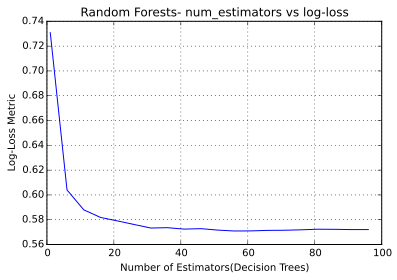

In [87]:
while (res.ready() != True):
    continue

x_axis = []
y_axis = []
    
for x in range(0,len(res)):
    x_axis.append(res[x][1])
    y_axis.append(res[x][0])
    
plt.plot(x_axis, y_axis)             # plot alpha value on x vs accuracy on y
plt.xlabel('Number of Estimators(Decision Trees)')                      # set the x-axis label
plt.ylabel('Log-Loss Metric')           # set the y-axis label
plt.title('Random Forests- num_estimators vs log-loss')  # set the title
plt.grid(True)

In [95]:
#Training FULL DATASET with Soft Voting Classifier
clf1 = linear_model.LogisticRegression(random_state=1, C = 0.2)
clf2 = ensemble.RandomForestClassifier(random_state=1, n_estimators = 60)
eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf = eclf.fit(X,Y)
eclf_probs = eclf.predict_proba(joined3_tst)

write_csv_kaggle('Soft_Voting_LR_and_RandomForest.csv',test_ids_,eclf_probs)

# Gradient Boosting 

In [ ]:
original_params = {}

clf = 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)                 


In [70]:
#GRADIENT BOOSTING
from sklearn.metrics import *
params = {'n_estimators': range(80,300,20),'learning_rate': [0.30,0.35,0.40,0.45,0.5]}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))
print len(pg)

55


# Parameter Tuning 
   * (Insufficient Hardware Resources for Cross Validation)

In [71]:
# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}

def Gradient_Booster(data, params):
    clf_GBM = ensemble.GradientBoostingClassifier(n_estimators=params['n_estimators'], learning_rate = params['learning_rate'], )
    clf_GBM.fit(data['trainX'], data['trainY'])
    clf_GBM_probs = clf_GBM.predict_proba(data['testX'],)
    
    
    score = log_loss(data['testY'], clf_GBM_probs)
    
    return (score, params)

# get the load-balanced scheduler
lview = clients.load_balanced_view()

lview.block = False

# run the function on all parameters
res = lview.map(Gradient_Booster, [data]*len(pg), pg)
for result in res:
    print result

(0.54420378549224591, {'n_estimators': 80, 'learning_rate': 0.3})
(0.54078215214055758, {'n_estimators': 100, 'learning_rate': 0.3})
(0.543586250369128, {'n_estimators': 120, 'learning_rate': 0.3})
(0.54560212517858764, {'n_estimators': 140, 'learning_rate': 0.3})
(0.54582378294925915, {'n_estimators': 160, 'learning_rate': 0.3})
(0.55083944231354642, {'n_estimators': 180, 'learning_rate': 0.3})
(0.55136502868458859, {'n_estimators': 200, 'learning_rate': 0.3})
(0.55843713198950307, {'n_estimators': 220, 'learning_rate': 0.3})
(0.55456722917805268, {'n_estimators': 240, 'learning_rate': 0.3})
(0.5632996543449279, {'n_estimators': 260, 'learning_rate': 0.3})
(0.56793579594251953, {'n_estimators': 280, 'learning_rate': 0.3})
(0.54603090936888143, {'n_estimators': 80, 'learning_rate': 0.35})
(0.5492116316069785, {'n_estimators': 100, 'learning_rate': 0.35})
(0.54368833032370645, {'n_estimators': 120, 'learning_rate': 0.35})
(0.54608580362897274, {'n_estimators': 140, 'learning_rate': 0.35

0.540199920943
haleelujah


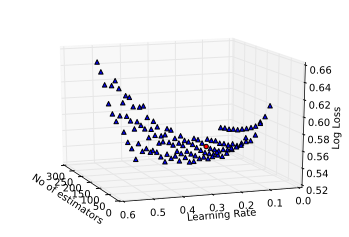

In [142]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

results[0][1]['n_estimators']
ctr = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
min = 1
index = 0
for x in range(0,len(results)):
    if results[x][0] < min:
        min = results[x][0]
        index = x
print min

for x in range(0,len(results)):
    xs_n_estimators = (results[x][1]['n_estimators'])
    ys_learning_rate = (results[x][1]['learning_rate'])
    zs_logloss = results[x][0]
    
    if x == index:
        print 'haleelujah'
        ax.scatter(xs_n_estimators, ys_learning_rate, zs_logloss, c='r', marker='o')
    else:
        ax.scatter(xs_n_estimators, ys_learning_rate, zs_logloss, c='b', marker='^')



ax.set_xlabel('No of estimators')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Log Loss')

# To view 3D version of the outcomes
#for ii in xrange(0,360,1):
#    ax.view_init(elev=10., azim=ii)
#    filename = "movie" + str(ii)+ ".png"
#    plt.savefig(filename)
ax.view_init(elev=15, azim=160)
plt.show()

In [150]:
# NO POTENTIAL GAIN- min weight in Gradient Booster

from sklearn.metrics import *
def Gradient_Booster_min_weight(data, params):
    clf_GBM = ensemble.GradientBoostingClassifier(n_estimators=params['n_estimators'], learning_rate = params['learning_rate'], min_weight_fraction_leaf = params['min_weight_fraction_leaf'])
    clf_GBM.fit(data['trainX'], data['trainY'])
    clf_GBM_probs = clf_GBM.predict_proba(data['testX'],)
    
    
    score = log_loss(data['testY'], clf_GBM_probs)
    
    return (score, params)  
                                                  
#GRADIENTBOOSTING with weights
params = {'n_estimators': [220],'learning_rate': [0.15], 'min_weight_fraction_leaf': [0.011, 0.013,0.015]}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))
print len(pg)
# run the function on all parameters
res = lview.map(Gradient_Booster_min_weight, [data]*len(pg), pg)
for result in res:
    print result               

3
(0.5574802911022847, {'n_estimators': 220, 'learning_rate': 0.15, 'min_weight_fraction_leaf': 0.011})
(0.55553440312625213, {'n_estimators': 220, 'learning_rate': 0.15, 'min_weight_fraction_leaf': 0.013})
(0.5588634542500921, {'n_estimators': 220, 'learning_rate': 0.15, 'min_weight_fraction_leaf': 0.015})


In [27]:
print testY

id
17103    0
6790     1
975      0
13865    0
13533    0
6286     0
179      0
15145    0
18030    0
17213    1
4635     1
7126     2
16087    0
859      1
12707    0
10683    0
3823     0
14303    1
11466    1
12352    0
8228     1
15882    0
15972    0
4833     1
7377     0
14870    0
2560     0
1110     2
15082    0
14634    1
        ..
12896    2
8535     2
4949     1
8281     0
1718     1
14829    0
9736     0
5665     0
14999    0
8263     1
15320    0
11955    0
7904     0
16424    0
11580    0
16913    0
5345     2
5702     1
466      1
12103    0
1936     0
14768    1
14434    0
9758     2
9727     0
519      0
12699    0
9155     0
5021     1
8682     0
Name: fault_severity, dtype: int64


In [ ]:
#Multinomial Naive Bayes model (with smoothing)
# Naive Bayes for non text data = Not the best. Utter garbage

from sklearn.metrics import *
best_score = 1000
best_alpha = 0
for x in arange(0.1,0.2,0.1):
    nbmulti = naive_bayes.MultinomialNB(alpha=x,fit_prior=False,class_prior = [0.5,0.25,0.25])
    nbmulti.fit(trainX, trainY)
    testing = testY.as_matrix()
    np.set_printoptions(threshold=np.nan)
    predY = nbmulti.predict_proba(testX)
    predY__ = nbmulti.predict(testX)
    print 'hello'
    for x in range(len(predY__)):
        if (predY__[x]==testing[x])==False:
            print testX.iloc[x].index.values
    score = log_loss(testY, predY)
    print score
    if score < best_score:
        best_score = score
        best_alpha = x
print best_score,best_alpha

hello
['location' 'severity_type' 'event_type_11' 'event_type_13' 'event_type_34'
 'event_type_35' 'event_type_42' 'event_type_44' 'event_type_54'
 'event_type_10' 'event_type_20' 'event_type_15' 'event_type_43'
 'event_type_30' 'event_type_38' 'event_type_22' 'event_type_23'
 'event_type_14' 'event_type_32' 'event_type_24' 'event_type_50'
 'event_type_5' 'event_type_21' 'event_type_45' 'event_type_2'
 'event_type_18' 'event_type_27' 'event_type_40' 'event_type_28'
 'event_type_29' 'event_type_8' 'event_type_47' 'event_type_46'
 'event_type_19' 'event_type_51' 'event_type_26' 'event_type_36'
 'event_type_9' 'event_type_6' 'event_type_7' 'event_type_3'
 'event_type_39' 'event_type_1' 'event_type_53' 'event_type_49'
 'event_type_31' 'event_type_48' 'event_type_41' 'event_type_37'
 'event_type_12' 'event_type_25' 'resource_type_8' 'resource_type_6'
 'resource_type_2' 'resource_type_3' 'resource_type_9' 'resource_type_7'
 'resource_type_4' 'resource_type_1' 'resource_type_10' 'resource_typ

In [ ]:
clf_GBM.fit(data['trainX'], data['trainY'])
clf_GBM_probs = clf_GBM.predict_proba(data['testX'],)
score = log_loss(data['testY'], clf_GBM_probs)
return (score, params)


# Simple Soft Voting Ensemble

In [70]:
#Training FULL DATASET with Soft Voting Classifier
clf1 = linear_model.LogisticRegression(random_state=1, C = 0.2)
clf2 = ensemble.RandomForestClassifier(random_state=1, n_estimators = 60)
clf3 = ensemble.GradientBoostingClassifier(n_estimators=220, learning_rate = 0.15)
eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')
eclf = eclf.fit(X,Y)
eclf_probs = eclf.predict_proba(joined3_tst)

write_csv_kaggle('Kickass_Ensemble.csv',test_ids_,eclf_probs)

In [1]:
# Linear SVM one vs Rest Parameter Tuning

In [ ]:
from sklearn.metrics import *
from sklearn.svm import *
from sklearn.multiclass import OneVsRestClassifier

def LinearSVM(data, params):
    classif = OneVsRestClassifier(SVC(kernel = 'linear',C=params[0],probability=True))
    classif = classif.fit(data['trainX'], data['trainY'])
    classif_train_error = classif.score(data['trainX'], data['trainY'])
    classif_prediction = classif.predict_proba(data['testX'])
    score = log_loss(data['testY'], classif_prediction)
    
    return (classif_train_error,score, params)  
                                                  
#GRADIENTBOOSTING with weights
params = {'C': [1]}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))
print len(pg)
# run the function on all parameters
#res = lview.map(LinearSVM, [data]*len(pg), pg)
res = LinearSVM(data,[1])

for result in res:
    print result               

In [ ]:
for result in res:
    print result 

In [25]:
def plot_manifolds(X, Y, Xrs, titles=None, spwidth=2):
# X - original points
# Y - colors
# Xrs - manifold points (list of manifolds)
    numX = len(Xrs)

    if titles==None:
        titles = []
        for i in range(numX):
            titles.append("manifold" + str(i+1)) 
    
    sx = spwidth
    sy = ceil((numX+1)/float(spwidth))
    
    fig = plt.gcf()
    for i in range(numX):   
        Xr = Xrs[i]
        ax = fig.add_subplot(100*sy+10*sx+i+2)
        ax.scatter(Xr[:, 0], Xr[:, 1], c=Y, cmap=plt.cm.Spectral)
        plt.title(titles[i]); plt.grid()

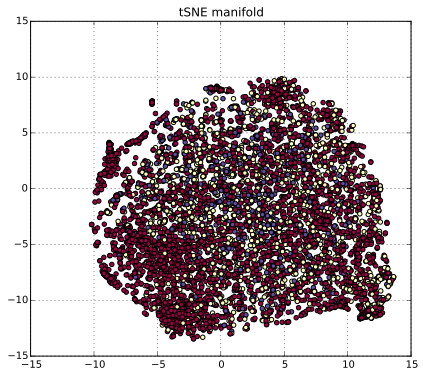

In [30]:
# Checking if the data is separable in a higher dimensional space
# perplexity = similar to number of neighbors
tsne = manifold.TSNE(n_components=2, perplexity=30.0, random_state=11)
Xr = tsne.fit_transform(final_df)

plt.figure(figsize=(15,6))
plot_manifolds(X, Y, [Xr], ["tSNE manifold"])

# Trying KNN Classifier

In [151]:
# K Nearest Neighbour classifier
# RANDOM FORESTS- Parameter Tuning
# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
from sklearn.metrics import *
params = {'n_neighbors': range(1,150,5)}
# makes combinations of all parameters
pg = list(grid_search.ParameterGrid(params))
print pg
# set the dataset
data = {'trainX': trainX, 'trainY': trainY, 'testX': testX, 'testY': testY}

def KNN(data, params):
    clf = neighbors.KNeighborsClassifier(n_neighbors=params['n_neighbors'],weights='distance')
    clf.fit(data['trainX'], data['trainY'])
    clf_probs = clf.predict_proba(data['testX'],)
    score = log_loss(data['testY'], clf_probs)
    # return a tuple with the accuracy and the parameters used
    return (score, params['n_neighbors'])

# get the load-balanced scheduler
lview = clients.load_balanced_view()

lview.block = False

# run the function on all parameters
res = lview.map(KNN, [data]*len(pg), pg)


[{'n_neighbors': 1}, {'n_neighbors': 6}, {'n_neighbors': 11}, {'n_neighbors': 16}, {'n_neighbors': 21}, {'n_neighbors': 26}, {'n_neighbors': 31}, {'n_neighbors': 36}, {'n_neighbors': 41}, {'n_neighbors': 46}, {'n_neighbors': 51}, {'n_neighbors': 56}, {'n_neighbors': 61}, {'n_neighbors': 66}, {'n_neighbors': 71}, {'n_neighbors': 76}, {'n_neighbors': 81}, {'n_neighbors': 86}, {'n_neighbors': 91}, {'n_neighbors': 96}]


(11.219721727850965, 1)
(1.9698073888585517, 6)
(1.0625852259195934, 11)
(0.94304689144195619, 16)
(0.86957957916143869, 21)
(0.81222159586550069, 26)
(0.76416166816014819, 31)
(0.74238225380949785, 36)
(0.72137792875961437, 41)
(0.69903512852451988, 46)
(0.70147832070116201, 51)
(0.70357224138132424, 56)
(0.68976208722533372, 61)
(0.69243931919055746, 66)
(0.67080247211772459, 71)
(0.67328179156457957, 76)
(0.67461113441974019, 81)
(0.67635939280554735, 86)
(0.67806423712496255, 91)
(0.67958382782546389, 96)
Best Result =(0.67080247211772459, 71)


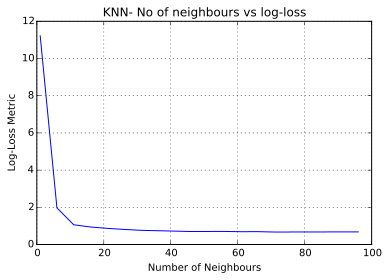

In [164]:
for result in res:
    print result
    
x_axis = []
y_axis = []
    
for x in range(0,len(res)):
    x_axis.append(res[x][1])
    y_axis.append(res[x][0])
    
plt.plot(x_axis, y_axis)             # plot alpha value on x vs accuracy on y
plt.xlabel('Number of Neighbours')                      # set the x-axis label
plt.ylabel('Log-Loss Metric')           # set the y-axis label
plt.title('KNN- No of neighbours vs log-loss')  # set the title
plt.grid(True)
min_loss= 10
n_ = 0
for x in range(0,len(res)):
    if res[x][0] < min_loss:
        min_loss = res[x][0]
        n_ = res[x][1]
print '======================================='
print 'Best Result =' + str((min_loss,n_))
print '======================================='


In [169]:
X_ = X.transpose()
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
svd.fit_transform(X_)
final_df = np.transpose(svd.components_)
print final_df.shape
X_ = joined3_tst.transpose()
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
svd.fit_transform(X_)
final_df_test = np.transpose(svd.components_)
print final_df_test.shape

(7381L, 50L)
(11171L, 50L)


# Back to Soft Voting


In [170]:
#Training FULL DATASET with Soft Voting Classifier
clf1 = linear_model.LogisticRegression(random_state=1, C = 0.2)
clf2 = ensemble.RandomForestClassifier(random_state=1, n_estimators = 60)
clf3 = ensemble.GradientBoostingClassifier(n_estimators=220, learning_rate = 0.15)
clf4 = neighbors.KNeighborsClassifier(n_neighbors=70,weights='distance')

eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3), ('knn',clf4)], voting='soft')
eclf = eclf.fit(final_df,Y)
eclf_probs = eclf.predict_proba(final_df_test)

write_csv_kaggle('Soft_Vote_Ensemble_with_KNN_withDimRed.csv',test_ids_,eclf_probs)
